In [66]:
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np

In [197]:
class Malthusian:
    
    """
    Implements the Malthusian Model with:
    
    1. population growth 
        n =  β*((1/ϕ)*y-ysub)
        
    2. growth of efficiency-of-labor 
        g = h-n/γ
    """
    def __init__(self,
                 L = 1,                 # initial labor force
                 E = 1,                 # initial efficiency of labor
                 K = 1,                 # initial capital stock
                 
                 # determinants of n (population growth):
                 β = 0.001,               # responsiveness of population growth to increased prosperity.
                 ϕ = 1.1,
                 ysub = 0.9,
                 
                 # determinants of g(efficiency-of-labor growth):
                 h = 0.01,              # rate at which useful ideas are generated
                 γ = 100,                # effect-of-resource scarcity parameter  
                 
                 s = 0.15,              # savings-investment rate
                 α = 0.5,               # orientation-of-growth-toward-capital parameter
                 δ = 0.05,              # deprecation rate on capital parameter
                ):
        self.L, self.E, self.K, self.h, self.γ, self.s, self.α, self.δ = L, E, K, h, γ, s, α, δ 
        self.β, self.ϕ, self.ysub = β, ϕ, ysub
        
        # production (or output)
        self.Y = self.K**self.α*(self.E*self.L)**(1-self.α) 
        self.y = self.Y/self.L
        
        # population growth 
        self.n = self.β*((1/self.ϕ)*self.y-self.ysub)
        
        # growth rate of efficiency-of-labor
        self.g = self.h-self.n/self.γ
        
        # capital-output ratio 
        self.κ = self.K/self.Y    
        
        # store initial data
        self.initdata = vars(self).copy()
    
    def update(self):
        # unpack parameters
        K, s, Y, δ, L, n, E, g, α =self.K, self.s, self.Y, self.δ, self.L, self.n, self.E, self.g, self.α
        β, ϕ, ysub, h, γ = self.β, self.ϕ, self.ysub, self.h, self.γ
        
        #update variables        
        K = s*Y + (1-δ)*K
        L = L*np.exp(n)
        E = E*np.exp(g)
        Y = K**α*(E*L)**(1-α)
        y = Y/L
        κ = K/Y
        n = β*((1/ϕ)*y-ysub)
        g = h-n/γ
                
        #store variables
        self.K, self.s, self.Y, self.δ, self.L, self.n, self.E, self.g, self.α = K, s, Y, δ, L, n, E, g, α
        self.κ, self.y = κ, y
        
    def gen_seq(self, t, var = 'κ', init = True, log = False):
        "Generate and return time series of selected variable. Variable is κ by default."
        
        path = []
        
        # initialize data 
        if init == True:
            for para in self.initdata:
                 setattr(self, para, self.initdata[para])

        for i in range(t):
            path.append(vars(self)[var])
            self.update()
        
        if log == False:
            return path
        else:
            return np.log(np.asarray(path))

    def steady_state(self, disp = True):
        "Calculate variable values in the steady state"
        #unpack parameters
        s, γ, h, δ, ϕ, ysub, β, α= self.s, self.γ, self.h, self.δ, self.ϕ, self.ysub, self.β, self.α
        
        self.mal_κ = s/(γ*h+δ)
        # malthusian rate of population growth
        self.mal_n = γ*h
        # malthusian standard of living
        self.mal_y = ϕ*(ysub+γ*h/β)
        self.mal_E = self.mal_y*((γ*h+δ)/s)**(α/(1-α))
        
        if display == True:
            return(f'steady-state capital-output ratio κ: {self.mal_κ:.2f}')
            return(f'Malthusian rate of population growth n: {self.mal_n: .2f}')
            return(f'Malthusian standard of living y: {self.mal_y:.2f}')
            return(f'steady-state efficiency-of-labor E: {self.mal_E:.2f}') 
        else: 
            return(self.mal_κ,self.mal_n,self.mal_y,self.mal_E)

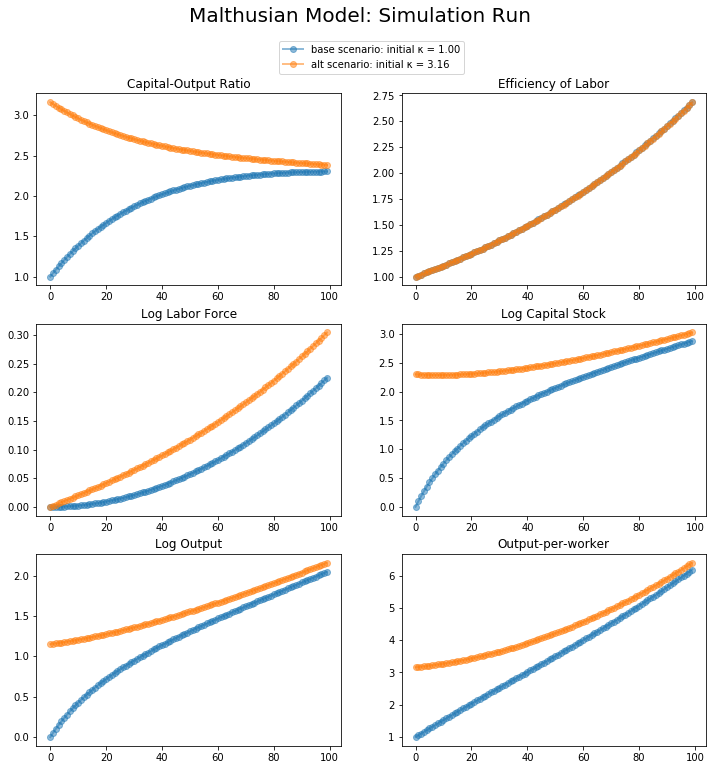

In [198]:
T = 100

m_base = Malthusian(K=1.0)
m_base.scenario = "base scenario"
m_alt = Malthusian(K=10)
m_alt.scenario = "alt scenario"

figcontents = {
        (0,0):('κ','Capital-Output Ratio', False),
        (0,1):('E','Efficiency of Labor', False),
        (1,0):('L','Log Labor Force', True),
        (1,1):('K','Log Capital Stock', True),
        (2,0):('Y','Log Output', True),
        (2,1):('y','Output-per-worker', False)
       }

num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
for i in range(num_rows):
    for j in range(num_cols):
        for m in m_base, m_alt:
            lb = f'{m.scenario}: initial κ = {m.initdata["κ"]:.2f}'
            axes[i,j].plot(m.gen_seq(T, var = figcontents[i,j][0], log = figcontents[i,j][2]),'o-', lw=2, alpha=0.5, label=lb)
            axes[i,j].set(title=figcontents[i,j][1])

#   global legend
axes[(0,0)].legend(loc='upper center', bbox_to_anchor=(1.1,1.3))
plt.suptitle('Malthusian Model: Simulation Run', size = 20)
plt.show()    

In [200]:
print('Steady state in the base scenario is same as in the alt scenario?') 
m_base.steady_state() == m_alt.steady_state()

Steady state in the base scenario is same as in the alt scenario?


True

Notice that the steady state is not affected by where we start.

### What if a certain parameter changes value in the course of development?
To start with, here we consider the time period 0AD - 500AD.

### Assume useful ideas stopped developing since 250AD:

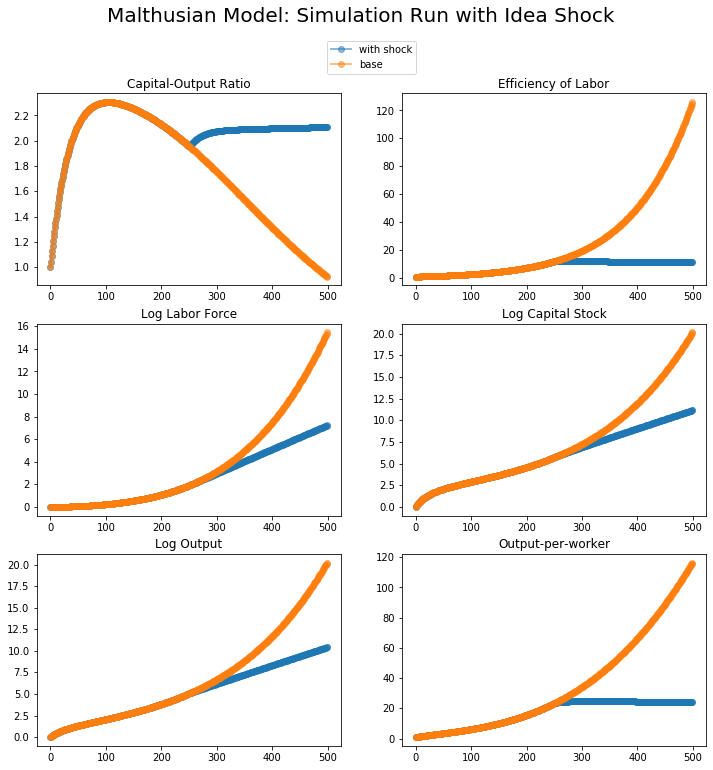

In [162]:
m  = Malthusian()

# generate and store sequences before the change:
T1 = 250 # time before change
T2 = 250 # time after change

figcontents = {
        (0,0):('κ','Capital-Output Ratio', False),
        (0,1):('E','Efficiency of Labor', False),
        (1,0):('L','Log Labor Force', True),
        (1,1):('K','Log Capital Stock', True),
        (2,0):('Y','Log Output', True),
        (2,1):('y','Output-per-worker', False)
       }

num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
for i in range(num_rows):
    for j in range(num_cols):
        for scenario in {'base', 'with shock'}:
            seq = m.gen_seq(T1, var = figcontents[i,j][0], log = figcontents[i,j][2])
            lb = f'{scenario}'
            if scenario == 'with shock':
                m.h = 0
            seq = np.append(seq, m.gen_seq(T2, var = figcontents[i,j][0], log = figcontents[i,j][2], init = False))
            axes[i,j].plot(seq,'o-', lw=2, alpha=0.5, label=lb)
            axes[i,j].set(title=figcontents[i,j][1])

axes[(0,0)].legend(loc='upper center', bbox_to_anchor=(1.1,1.3))
plt.suptitle('Malthusian Model: Simulation Run with Idea Shock', size = 20)
plt.show()   

### Consider a plague happened on 250AD:
The plague decreased the total population (and thus labor force) to 1/10. 

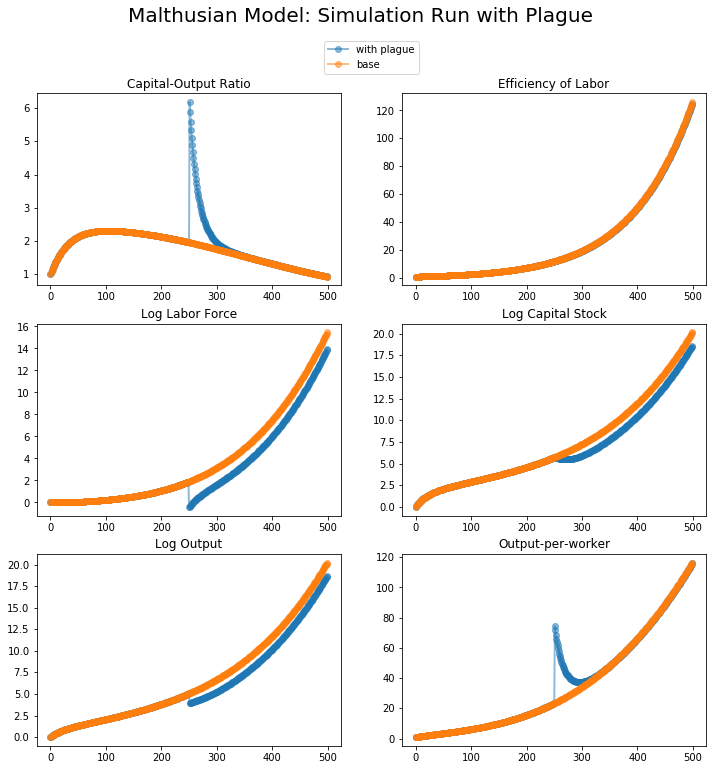

In [164]:
m  = Malthusian()

# generate and store sequences before the change:
T1 = 250 # time before change
T2 = 250 # time after change

figcontents = {
        (0,0):('κ','Capital-Output Ratio', False),
        (0,1):('E','Efficiency of Labor', False),
        (1,0):('L','Log Labor Force', True),
        (1,1):('K','Log Capital Stock', True),
        (2,0):('Y','Log Output', True),
        (2,1):('y','Output-per-worker', False)
       }

num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
for i in range(num_rows):
    for j in range(num_cols):
        for scenario in {'base', 'with plague'}:
            seq = m.gen_seq(T1, var = figcontents[i,j][0], log = figcontents[i,j][2])
            lb = f'{scenario}'
            if scenario == 'with plague':
                m.L = 1/10*m.L 
            seq = np.append(seq, m.gen_seq(T2, var = figcontents[i,j][0], log = figcontents[i,j][2], init = False))
            axes[i,j].plot(seq,'o-', lw=2, alpha=0.5, label=lb)
            axes[i,j].set(title=figcontents[i,j][1])

axes[(0,0)].legend(loc='upper center', bbox_to_anchor=(1.1,1.3))
plt.suptitle('Malthusian Model: Simulation Run with Plague', size = 20)
plt.show()   

To summarize, the shock on idea development will change the steady state and the development path, while a plague would not change the steady state.